# Dimension reduction in Python

In [4]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## the lab

You can choose one of the following data sets:
- **MNIST:** The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples.
- **Fashion MNIST:** Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples.
- **CIFAR10:** The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. 

The following cells allow you to load each of the data sets.

In [5]:
# # Load MNIST dataset
# from keras.datasets import mnist
# (X_train, y_train), (X_test, y_test) = mnist.load_data()
# print(X_train.shape, X_test.shape)

# # In the rest of this exercise, use only the test part of Fashion MINIST which already includes 10.000 images.
# data = X_test
# target = y_test

# # For a better understanding, let's create a dictionary that will have class names
# # with their corresponding categorical class labels.
# label_dict = {
#  0: '0',
#  1: '1',
#  2: '2',
#  3: '3',
#  4: '4',
#  5: '5',
#  6: '6',
#  7: '7',
#  8: '8',
#  9: '8',
# }

In [6]:
# # Load Fashion MNIST dataset
# from keras.datasets import fashion_mnist
# (X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
# print(X_train.shape, X_test.shape)


# # In the rest of this exercise, use only the test part of Fashion MINIST which already includes 10.000 images.
# data = X_test
# target = y_test

# # For a better understanding, let's create a dictionary that will have class names
# # with their corresponding categorical class labels.
# label_dict = {
#  0: 'T-shirt/top',
#  1: 'Trouser',
#  2: 'Pullover',
#  3: 'Dress',
#  4: 'Coat',
#  5: 'Sandal',
#  6: 'Shirt',
#  7: 'Sneaker',
#  8: 'Bag',
#  9: 'Ankle boot',
# }

In [7]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print(X_train.shape, X_test.shape)

# In the rest of this exercise, use only the test part of CIFAR which already includes 10.000 images.
data = X_test
target = y_test

# For a better understanding, let's create a dictionary that will have class names
# with their corresponding categorical class labels.
label_dict = {
 0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck',
}


(50000, 32, 32, 3) (10000, 32, 32, 3)


By deleting 2 of the 3 cells in the code above, you can select your dataset.

- How many classes does the dataset contain?
- What are the classes?

In [8]:
classes = label_dict.values()
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  dict_values(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])


- Draw the first and last image of the data set with its label.

Text(0.5, 1.0, '(Label: cat)')
Text(0.5, 1.0, '(Label: horse)')


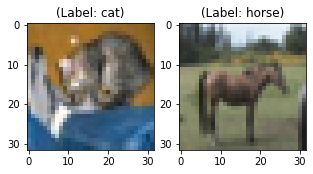

In [9]:
plt.figure(figsize=[5,5])

# Display the first image
plt.subplot(121)

plt.imshow(data[0])

print(plt.title("(Label: " + str(label_dict[target[0][0]]) + ")"))

# Display the last image of the dataset
plt.subplot(122)
plt.imshow(data[-1])
print(plt.title("(Label: " + str(label_dict[target[-1][0]]) + ")"))

- Let's quickly check the maximum and minimum values of the images and <b>``normalize``</b> the pixels between 0 and 1 inclusive.

In [10]:
print("Before normalization:", np.min(data),np.max(data))
if np.amax(data) == 255:
    data = data / 255
print("After normalization: ", np.min(data),np.max(data))

Before normalization: 0 255
After normalization:  0.0 1.0


- Next, you will create a DataFrame that will hold the pixel values of the images along with their respective labels in a row-column format.

- But before that, let's reshape the image dimensions to one (flatten the images).

In [11]:
# Flatten the images
data_flat = np.reshape(data, (10000, -1))

# Build DataFrame
feat_cols = ['pixel'+str(i) for i in range(data_flat.shape[1])]
df = pd.DataFrame(data=data_flat, columns=feat_cols)
df['label'] = target
df['label'].replace(label_dict, inplace=True)
print(f'Size of the dataframe: {df.shape}')

Size of the dataframe: (10000, 3073)


In [12]:
data_flat
data_flat.shape

(10000, 3072)

### Data visualization using PCA

- Next, you will create the PCA method and pass the number of components as two and apply ``fit_transform`` on the training data (without the label), this can take few seconds since there are a lot of samples

In [13]:
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel3063,pixel3064,pixel3065,pixel3066,pixel3067,pixel3068,pixel3069,pixel3070,pixel3071,label
0,0.619608,0.439216,0.192157,0.623529,0.435294,0.184314,0.647059,0.454902,0.200000,0.650980,...,0.094118,0.301961,0.486275,0.133333,0.329412,0.505882,0.082353,0.262745,0.431373,cat
1,0.921569,0.921569,0.921569,0.905882,0.905882,0.905882,0.909804,0.909804,0.909804,0.909804,...,0.658824,0.717647,0.698039,0.705882,0.764706,0.749020,0.729412,0.784314,0.780392,ship
2,0.619608,0.745098,0.870588,0.619608,0.733333,0.854902,0.545098,0.650980,0.760784,0.517647,...,0.019608,0.023529,0.031373,0.015686,0.019608,0.011765,0.027451,0.031373,0.027451,ship
3,0.607843,0.611765,0.584314,0.654902,0.690196,0.733333,0.690196,0.701961,0.756863,0.745098,...,0.235294,0.247059,0.196078,0.250980,0.254902,0.203922,0.286275,0.266667,0.196078,airplane
4,0.254902,0.266667,0.196078,0.274510,0.317647,0.250980,0.188235,0.250980,0.180392,0.117647,...,0.560784,0.701961,0.533333,0.603922,0.725490,0.572549,0.501961,0.611765,0.458824,frog
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.298039,0.305882,0.521569,0.298039,0.305882,0.525490,0.301961,0.313725,0.517647,0.298039,...,0.800000,0.858824,0.925490,0.784314,0.843137,0.917647,0.780392,0.847059,0.925490,ship
9996,0.317647,0.223529,0.168627,0.356863,0.270588,0.207843,0.384314,0.294118,0.247059,0.415686,...,0.607843,0.545098,0.505882,0.670588,0.654902,0.576471,0.654902,0.643137,0.627451,cat
9997,0.078431,0.058824,0.047059,0.074510,0.054902,0.043137,0.058824,0.054902,0.043137,0.058824,...,0.094118,0.090196,0.196078,0.101961,0.090196,0.207843,0.098039,0.078431,0.184314,dog
9998,0.098039,0.156863,0.047059,0.058824,0.141176,0.011765,0.090196,0.160784,0.070588,0.066667,...,0.364706,0.486275,0.313725,0.372549,0.482353,0.317647,0.360784,0.470588,0.313725,automobile


In [15]:
pca = PCA()
x_pca = pca.fit_transform(data_flat)
print(x_pca)

[[-3.69440580e+00  8.71710534e-01  1.19581745e+00 ...  7.59677825e-04
  -6.94724819e-04 -2.30160948e-04]
 [ 9.68880135e+00 -9.68997898e+00  4.97895380e+00 ... -3.44096858e-04
   7.58585803e-04  2.19946330e-04]
 [ 4.42347279e+00 -8.88709390e+00  3.94258773e+00 ...  1.04933755e-03
  -1.88328723e-04  1.02592823e-03]
 ...
 [-1.54207953e+01  2.53453823e+00 -4.78908667e-01 ...  1.20979771e-03
   8.95084978e-04 -5.75715198e-05]
 [-6.10754631e+00  1.94741732e+00  3.54051996e+00 ... -7.76789933e-05
   2.06116963e-04  1.17894985e-03]
 [-1.93282893e+00 -1.85369142e+00 -2.32890656e+00 ... -4.59145440e-04
   1.91789334e-03  5.72078912e-05]]


In [17]:
x_pca.shape

(10000, 3072)

- Then you will convert the principal components for each images from a numpy array to a pandas DataFrame.

In [79]:
df.columns

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel3063', 'pixel3064', 'pixel3065', 'pixel3066', 'pixel3067',
       'pixel3068', 'pixel3069', 'pixel3070', 'pixel3071', 'label'],
      dtype='object', length=3073)

In [80]:
df_pca = pd.DataFrame(x_pca, columns=[f"pca_vect{i}" for i in range(x_pca.shape[1])])
df_pca["y"] = df["label"]

- Let's quickly find out the amount of information or ``variance`` the principal components hold.

0.7439448459915382

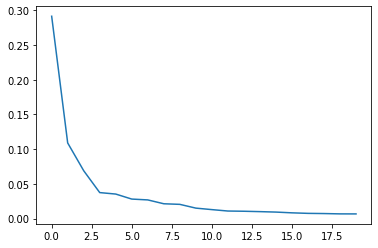

In [63]:
n_pca_vectors = 20
plt.plot(pca.explained_variance_ratio_[:n_pca_vectors])
pca.explained_variance_ratio_[:n_pca_vectors].sum()

Well, it looks like a decent amount of information was retained by the principal components 1 and 2, given that the data was projected from a lot of dimensions to a mere two principal components.

Its time to visualize the dataset in a two-dimensional space. Remember that there is some semantic class overlap in this dataset which means that a frog can have a slightly similar shape of a cat or a deer with a dog; especially when projected in a two-dimensional space. The differences between them might not be captured that well.


<AxesSubplot:xlabel='pca_vect0', ylabel='pca_vect1'>

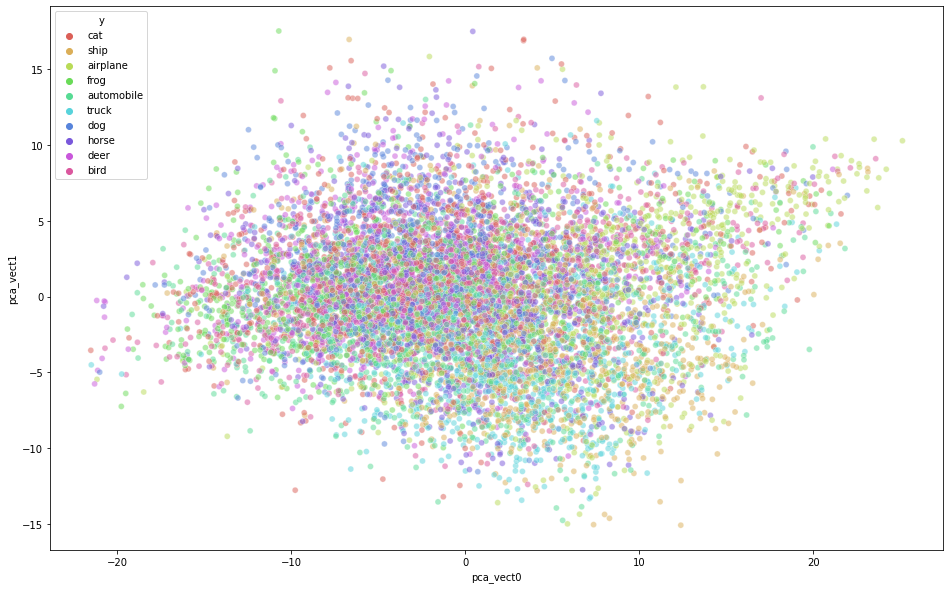

In [82]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=df_pca.pca_vect0, y=df_pca.pca_vect1,
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_pca,
    legend="full",
    alpha=0.5
)

From the above figure, you can observe that some variation was captured by the principal components since there is some structure in the points when projected along the two principal component axis. The points belonging to the same class are close to each other, and the points or images that are very different semantically are further away from each other.




### Data visualization using tSNE

Now you will do the same exercise using the t-SNE algorithm. Scikit-learn has an implementation of t-SNE available, and you can check its documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html). It provides a wide variety of tuning parameters for t-SNE, and the most notable ones are:
- **n_components** (default: 2): Dimension of the embedded space.
- **perplexity** (default: 30): The perplexity is related to the number of nearest neighbors that are used in other manifold learning algorithms. Consider selecting a value between 5 and 50.
- **early_exaggeration** (default: 12.0): Controls how tight natural clusters in the original space are in the embedded space and how much space will be between them.
- **learning_rate** (default: 200.0): The learning rate for t-SNE is usually in the range (10.0, 1000.0).
- **nc** (default: 1000): Maximum number of iterations for the optimization. Should be at least 250.
- **method** (default: ‘barnes_hut’): Barnes-Hut approximation runs in O(NlogN) time. method=’exact’ will run on the slower, but exact, algorithm in O(N^2) time.

Be careful: t-SNE takes much longer to run on the same data sample size than PCA.

In [84]:
tsne = TSNE()
x_tsne = tsne.fit_transform(data_flat)

Then you will convert the projection for each images from a numpy array to a pandas DataFrame.

In [86]:
df_tsne = pd.DataFrame(x_tsne)

Its time to visualize the dataset in a two-dimensional space. 

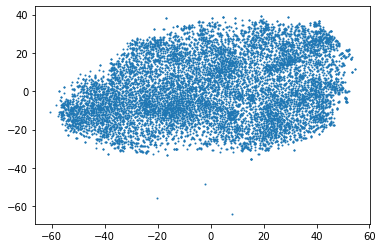

In [97]:
plt.scatter(df_tsne[0], df_tsne[1], s=1)

- If the 2-D representation is not satisfactory i.e. if the classes are not well separated.It depends on the data set. Do a PCA projection keeping 80% of the explained variance, then apply a t-SNE projection.
- **Attention:** depending on the dataset the calculation of the PCA for all features can be very long. Limit yourself to **50 components max.**

In [ ]:
'''your code here'''

### Data visualization using LDA

Do the same whith LDA projection

In [ ]:
'''your code here'''

- If the 2-D representation is not satisfactory i.e. if the classes are not well separated. It depends on the data set. Do a PCA 2-D projection in order to select the best components, then apply a LDA projection.

In [ ]:
'''your code here'''